# State-by-State Recent Bird Observations

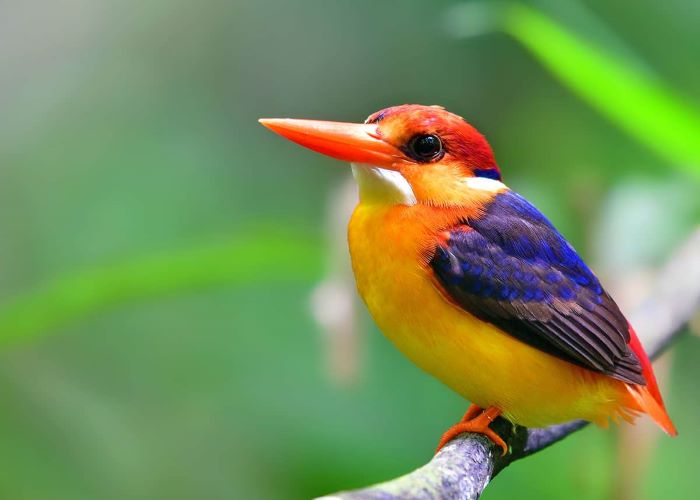

In [2]:
# import dependencies
import os
import requests
import json
import pandas as pd
import plotly.express as px
from config import api_key
from config import mapbox_token
from calendar import monthrange
import plotly.graph_objects as go

%reload_ext lab_black

px.set_mapbox_access_token(mapbox_token)

In [3]:
# Column names of main Dataframe
column_names = [
    "speciesCode",
    "comName",
    "sciName",
    "locId",
    "locName",
    "obsDt",
    "howMany",
    "lat",
    "lng	obsValid",
    "obsReviewed",
    "locationPrivate",
    "subId",
    "State",
]

# List of States
list_states = [
    "US-AL",
    "US-AK",
    "US-AZ",
    "US-AR",
    "US-CA",
    "US-CO",
    "US-CT",
    "US-DE",
    "US-DC",
    "US-FL",
    "US-GA",
    "US-HI",
    "US-ID",
    "US-IL",
    "US-IN",
    "US-IA",
    "US-KS",
    "US-KY",
    "US-LA",
    "US-ME",
    "US-MD",
    "US-MA",
    "US-MI",
    "US-MN",
    "US-MS",
    "US-MO",
    "US-MT",
    "US-NE",
    "US-NV",
    "US-NH",
    "US-NJ",
    "US-NM",
    "US-NY",
    "US-NC",
    "US-ND",
    "US-OH",
    "US-OK",
    "US-OR",
    "US-PA",
    "US-RI",
    "US-SC",
    "US-SD",
    "US-TN",
    "US-TX",
    "US-UT",
    "US-VT",
    "US-VA",
    "US-WA",
    "US-WV",
    "US-WI",
    "US-WY",
]

# Global Dataframe
g_dataframe = pd.DataFrame(columns=column_names)

# Each interation do a API call
for state in list_states:
    url = f"https://api.ebird.org/v2/data/obs/{state}/recent"
    r = requests.get(url, params={"key": api_key, "back": 1})
    df_obsdata = pd.DataFrame(r.json())

    # Attach the State code to the data frame
    df_obsdata["State"] = state

    # Append the local data to main data frame that has the state codes
    g_dataframe = pd.concat([g_dataframe, df_obsdata])

In [4]:
g_dataframe

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng\tobsValid,obsReviewed,locationPrivate,subId,State,lng,obsValid
0,tuftit,Tufted Titmouse,Baeolophus bicolor,L10124401,"33 Urell Street, Fort Rucker, Alabama, US (31....",2020-10-02 16:23,1.0,31.359477,NaN,False,True,S74330492,US-AL,-85.716264,True
1,amecro,American Crow,Corvus brachyrhynchos,L10124401,"33 Urell Street, Fort Rucker, Alabama, US (31....",2020-10-02 16:23,5.0,31.359477,NaN,False,True,S74330492,US-AL,-85.716264,True
2,norcar,Northern Cardinal,Cardinalis cardinalis,L10124401,"33 Urell Street, Fort Rucker, Alabama, US (31....",2020-10-02 16:23,7.0,31.359477,NaN,False,True,S74330492,US-AL,-85.716264,True
3,rthhum,Ruby-throated Hummingbird,Archilochus colubris,L10124401,"33 Urell Street, Fort Rucker, Alabama, US (31....",2020-10-02 16:23,2.0,31.359477,NaN,False,True,S74330492,US-AL,-85.716264,True
4,carchi,Carolina Chickadee,Poecile carolinensis,L10124401,"33 Urell Street, Fort Rucker, Alabama, US (31....",2020-10-02 16:23,4.0,31.359477,NaN,False,True,S74330492,US-AL,-85.716264,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,fragul,Franklin's Gull,Leucophaeus pipixcan,L418936,Wyoming Hereford Ranch--Reservoir #2,2020-10-02 06:56,2.0,41.126532,NaN,False,False,S74313413,US-WY,-104.642222,True
82,amegfi,American Goldfinch,Spinus tristis,L418936,Wyoming Hereford Ranch--Reservoir #2,2020-10-02 06:56,1.0,41.126532,NaN,False,False,S74313413,US-WY,-104.642222,True
83,killde,Killdeer,Charadrius vociferus,L418936,Wyoming Hereford Ranch--Reservoir #2,2020-10-02 06:56,55.0,41.126532,NaN,True,False,S74313413,US-WY,-104.642222,True
84,savspa,Savannah Sparrow,Passerculus sandwichensis,L418936,Wyoming Hereford Ranch--Reservoir #2,2020-10-02 06:56,1.0,41.126532,NaN,False,False,S74313413,US-WY,-104.642222,True


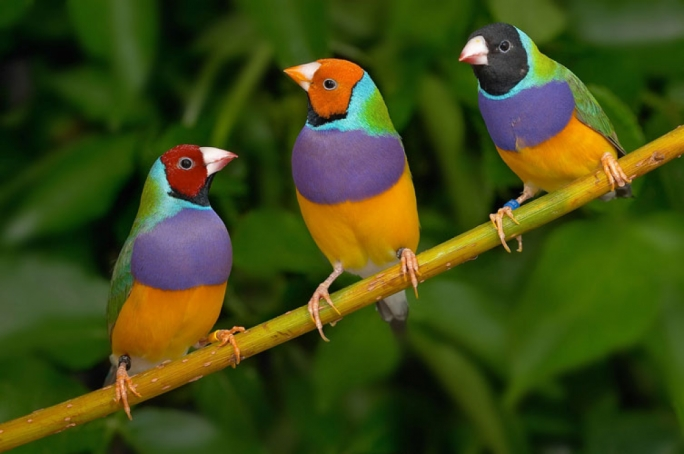

In [5]:
# Group by State
g_dataframe.groupby("State").sum()["howMany"]
obs_by_state = g_dataframe.groupby("State").sum()["howMany"]
obs_by_state

State
US-AK     206.0
US-AL     619.0
US-AR     381.0
US-AZ    1039.0
US-CA    1763.0
US-CO    1751.0
US-CT     765.0
US-DC     405.0
US-DE     870.0
US-FL    1643.0
US-GA    1171.0
US-HI      38.0
US-IA     562.0
US-ID     856.0
US-IL    1077.0
US-IN     836.0
US-KS    7318.0
US-KY    1369.0
US-LA     728.0
US-MA    1383.0
US-MD     857.0
US-ME    1001.0
US-MI     979.0
US-MN     904.0
US-MO     946.0
US-MS     617.0
US-MT     463.0
US-NC     736.0
US-ND     581.0
US-NE     735.0
US-NH     546.0
US-NJ    1008.0
US-NM    2405.0
US-NV    1584.0
US-NY    2393.0
US-OH     663.0
US-OK     948.0
US-OR    1074.0
US-PA    1236.0
US-RI     708.0
US-SC     962.0
US-SD     389.0
US-TN    1787.0
US-TX    1375.0
US-UT    3966.0
US-VA    1049.0
US-VT     658.0
US-WA    2017.0
US-WI    1133.0
US-WV     243.0
US-WY    2278.0
Name: howMany, dtype: float64

In [6]:
state_sum = pd.DataFrame(obs_by_state)
state_sum

,howMany
State,
US-AK,206.0
US-AL,619.0
US-AR,381.0
US-AZ,1039.0
US-CA,1763.0
US-CO,1751.0
US-CT,765.0
US-DC,405.0
US-DE,870.0


In [7]:
state_sum = state_sum.reset_index()
state_sum

,State,howMany
0,US-AK,206.0
1,US-AL,619.0
2,US-AR,381.0
3,US-AZ,1039.0
4,US-CA,1763.0
5,US-CO,1751.0
6,US-CT,765.0
7,US-DC,405.0
8,US-DE,870.0
9,US-FL,1643.0


In [8]:
state_sum["State_2D"] = state_sum["State"].str[3:]
state_sum

,State,howMany,State_2D
0,US-AK,206.0,AK
1,US-AL,619.0,AL
2,US-AR,381.0,AR
3,US-AZ,1039.0,AZ
4,US-CA,1763.0,CA
5,US-CO,1751.0,CO
6,US-CT,765.0,CT
7,US-DC,405.0,DC
8,US-DE,870.0,DE
9,US-FL,1643.0,FL


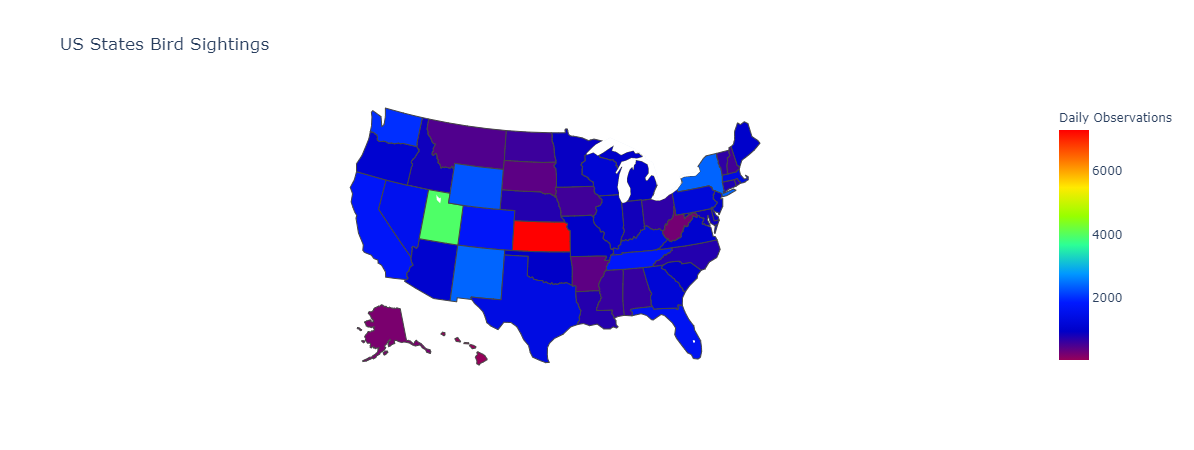

In [27]:
# state_sum = pd.read_csv(
# "https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv")

fig = go.Figure(
    data=go.Choropleth(
        locations=state_sum["State_2D"],  # Spatial coordinates
        z=state_sum["howMany"].astype(float),  # Data to be color-coded
        locationmode="USA-states",  # set of locations match entries in `locations`
        colorscale="rainbow",
        colorbar_title="Daily Observations",
    )
)

fig.update_layout(
    title_text="US States Bird Sightings ", geo_scope="usa",  # limite map scope to USA
)

fig.show()

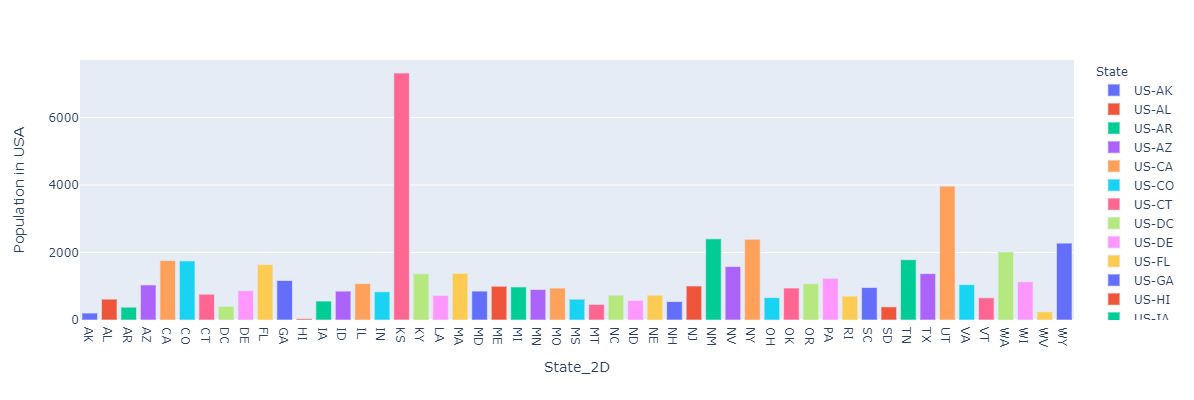

In [22]:
# data_canada = data[data.country == 'Canada']
fig = px.bar(
    state_sum,
    x="State_2D",
    y="howMany",
    # hover_data=["State_2D"],
    color="State",
    labels={"howMany": "Population in USA"},
    height=400,
)
fig.show()

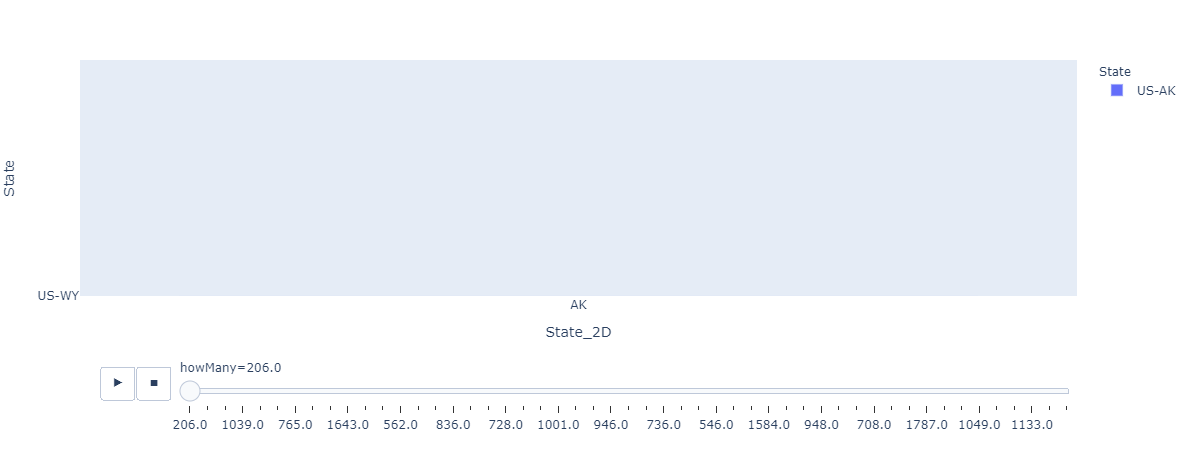

In [24]:
fig = px.bar(
    state_sum,
    x="State_2D",
    y="State",
    color="State",
    animation_frame="howMany",
    animation_group="State",
    range_y=[0, 100000],
)
fig.show()